In [ ]:
import os
import pandas as pd
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

In [2]:
from IPython.display import Audio
import librosa.display

file_path = 'UrbanSound8K/fold1/101415-3-0-2.wav'

audio, sr = librosa.load(file_path)

Audio(data=audio, rate=sr)

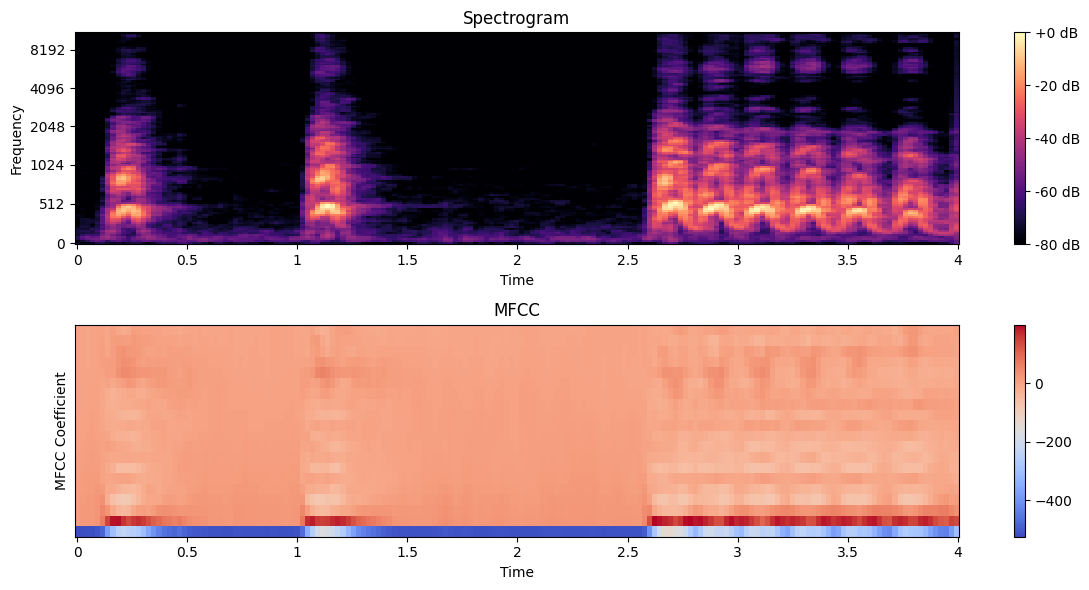

In [3]:
import matplotlib.pyplot as plt
import librosa.display

file_path = 'UrbanSound8K/fold1/101415-3-0-2.wav'

audio, sr = librosa.load(file_path)

spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)

mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=20)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficient')

plt.tight_layout()
plt.show()


In [4]:
metadata = pd.read_csv('UrbanSound8K.csv')

In [5]:
def extract_features_mfcc(file_path, duration=4, n_mfcc=20):
    audio, sr = librosa.load(file_path, duration=duration, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    return mfccs

def extract_features_spectrogram(file_path, duration=4):
    audio, sr = librosa.load(file_path, duration=duration, res_type='kaiser_fast')
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
    return spectrogram

In [6]:
def preprocess_data(data, feature_extractor):
    features = []
    labels = []
    max_shape = (0, 0)
    
    for index, row in data.iterrows():
        file_path = os.path.join('urbansound', 'fold' + str(row['fold']), row['slice_file_name'])
        if(os.path.exists(file_path)):
            if feature_extractor == 'mfcc':
                feature = extract_features_mfcc(file_path)
            elif feature_extractor == 'spectrogram':
                feature = extract_features_spectrogram(file_path)
            
            max_shape = (max(max_shape[0], feature.shape[0]), max(max_shape[1], feature.shape[1]))
            
            features.append(feature)
            labels.append(row['classID'])
    
    padded_features = []
    for arr in features:
        pad_width = ((0, max_shape[0] - arr.shape[0]), (0, max_shape[1] - arr.shape[1]))
        padded_arr = np.pad(arr, pad_width, mode='constant')
        padded_features.append(padded_arr)
    
    return padded_features, labels

In [7]:
feature_extractor = 'mfcc'
# feature_extractor = 'spectrogram'
features, labels = preprocess_data(metadata, feature_extractor)

c:\Users\timot\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(


In [8]:
print(features)
print(len(features))
print(len(features[1]))
print(len(features[1][1]))

[array([[-709.5514  , -695.5683  , -642.1646  , ...,    0.      ,
           0.      ,    0.      ],
       [  23.199575,   38.92923 ,   92.35632 , ...,    0.      ,
           0.      ,    0.      ],
       [  23.054962,   28.525764,   34.925377, ...,    0.      ,
           0.      ,    0.      ],
       ...,
       [  12.807192,   16.737059,   15.536615, ...,    0.      ,
           0.      ,    0.      ],
       [  11.938429,   17.317818,   19.123957, ...,    0.      ,
           0.      ,    0.      ],
       [  11.093041,   15.449339,   11.017851, ...,    0.      ,
           0.      ,    0.      ]], dtype=float32), array([[-629.07434  , -625.32825  , -623.4611   , ...,    0.       ,
           0.       ,    0.       ],
       [  25.96144  ,   30.618843 ,   32.86003  , ...,    0.       ,
           0.       ,    0.       ],
       [  17.17741  ,   20.073797 ,   21.242954 , ...,    0.       ,
           0.       ,    0.       ],
       ...,
       [  -2.5082698,   -4.665715 ,   -7

In [9]:
for idx, arr in enumerate(features):
    print(f"Array {idx}: {arr.shape}")

Array 0: (20, 173)
Array 1: (20, 173)
Array 2: (20, 173)
Array 3: (20, 173)
Array 4: (20, 173)
Array 5: (20, 173)
Array 6: (20, 173)
Array 7: (20, 173)
Array 8: (20, 173)
Array 9: (20, 173)
Array 10: (20, 173)
Array 11: (20, 173)
Array 12: (20, 173)
Array 13: (20, 173)
Array 14: (20, 173)
Array 15: (20, 173)
Array 16: (20, 173)
Array 17: (20, 173)
Array 18: (20, 173)
Array 19: (20, 173)
Array 20: (20, 173)
Array 21: (20, 173)
Array 22: (20, 173)
Array 23: (20, 173)
Array 24: (20, 173)
Array 25: (20, 173)
Array 26: (20, 173)
Array 27: (20, 173)
Array 28: (20, 173)
Array 29: (20, 173)
Array 30: (20, 173)
Array 31: (20, 173)
Array 32: (20, 173)
Array 33: (20, 173)
Array 34: (20, 173)
Array 35: (20, 173)
Array 36: (20, 173)
Array 37: (20, 173)
Array 38: (20, 173)
Array 39: (20, 173)
Array 40: (20, 173)
Array 41: (20, 173)
Array 42: (20, 173)
Array 43: (20, 173)
Array 44: (20, 173)
Array 45: (20, 173)
Array 46: (20, 173)
Array 47: (20, 173)
Array 48: (20, 173)
Array 49: (20, 173)
Array 50: 

In [10]:
X = np.array(features)
y = np.array(labels)
print(X)
print(y)

[[[-7.09551392e+02 -6.95568298e+02 -6.42164612e+02 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 2.31995754e+01  3.89292297e+01  9.23563232e+01 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 2.30549622e+01  2.85257645e+01  3.49253769e+01 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [ 1.28071918e+01  1.67370586e+01  1.55366154e+01 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 1.19384289e+01  1.73178177e+01  1.91239567e+01 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 1.10930414e+01  1.54493389e+01  1.10178509e+01 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]]

 [[-6.29074341e+02 -6.25328247e+02 -6.23461121e+02 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 2.59614391e+01  3.06188431e+01  3.28600311e+01 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 1.71774101e+01  2.00737972e+01  2.12429543e+01 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [-2.50826979e+00 -4.6

In [11]:
X = (X - np.mean(X)) / np.std(X)

label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(y))

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_val.shape)

(228, 20, 173)
(58, 20, 173)


In [13]:
X_train = X_train[..., np.newaxis]
X_val = X_val[..., np.newaxis]
print(X_train.shape)
print(X_val.shape)

(228, 20, 173, 1)
(58, 20, 173, 1)


In [14]:
input_shape = X_train[0].shape
num_classes = y_train.shape[1]
print(input_shape)
print(num_classes)

(20, 173, 1)
9


In [15]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 173, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 86, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 86, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 43, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 43, 128)        73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 21, 128)        0

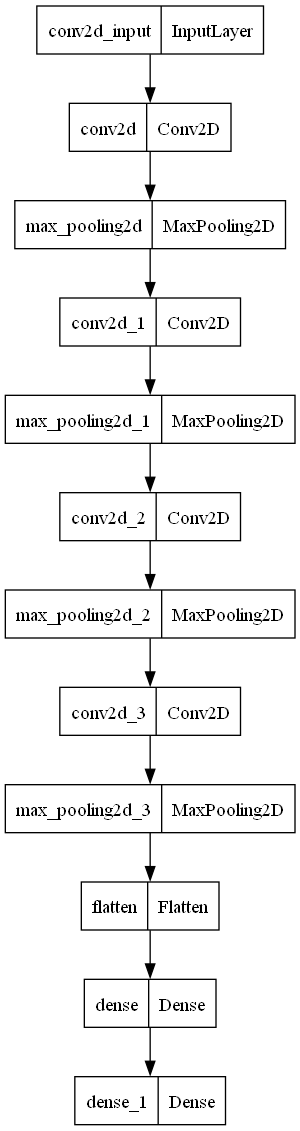

In [17]:
import pydot
from keras.utils import plot_model

plot_model(model, to_file='cnn_audio_librosa.png')


In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10


8/8 [==============================] - 1s 72ms/step - loss: 2.0607 - accuracy: 0.2018 - val_loss: 1.8674 - val_accuracy: 0.3276
Epoch 2/10
8/8 [==============================] - 0s 40ms/step - loss: 1.7016 - accuracy: 0.3596 - val_loss: 1.5015 - val_accuracy: 0.5172
Epoch 3/10
8/8 [==============================] - 0s 39ms/step - loss: 1.5641 - accuracy: 0.4079 - val_loss: 1.4926 - val_accuracy: 0.5345
Epoch 4/10
8/8 [==============================] - 0s 39ms/step - loss: 1.2695 - accuracy: 0.4825 - val_loss: 1.4461 - val_accuracy: 0.5000
Epoch 5/10
8/8 [==============================] - 0s 38ms/step - loss: 1.2211 - accuracy: 0.5439 - val_loss: 1.3816 - val_accuracy: 0.5517
Epoch 6/10
8/8 [==============================] - 0s 40ms/step - loss: 1.0685 - accuracy: 0.5570 - val_loss: 1.1578 - val_accuracy: 0.5862
Epoch 7/10
8/8 [==============================] - 0s 38ms/step - loss: 0.8345 - accuracy: 0.7018 - val_loss: 1.0334 - val_accuracy: 0.6724
Epoch 8/10
8/8 [=========

In [19]:
loss, accuracy = model.evaluate(X_val, y_val)
print("Accuracy:", accuracy)

2/2 [==============================] - 0s 11ms/step - loss: 0.9772 - accuracy: 0.6897
Accuracy: 0.6896551847457886


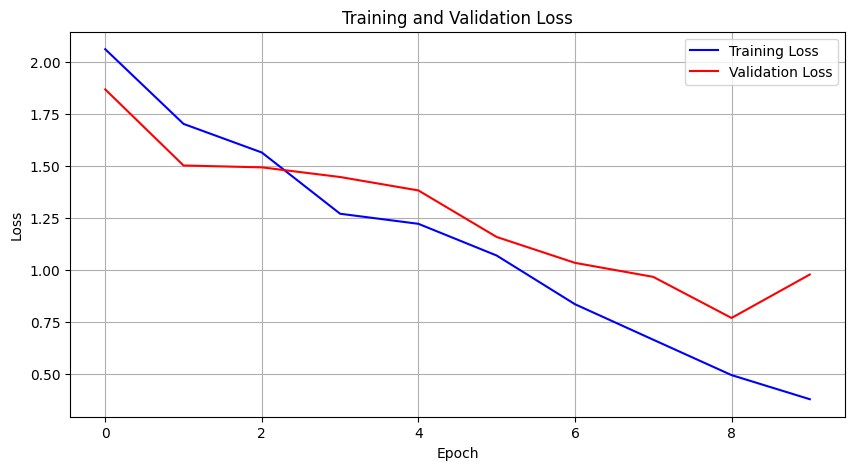

In [20]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
test_file_path = 'C:/Users/timot/Downloads/4.mp3'

def extract_features_mfcc_test(file_path, duration=4, n_mfcc=20):
    audio, sr = librosa.load(file_path, duration=duration, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    return mfccs

def preprocess_features_test(features, max_shape):
    pad_width = ((0, max_shape[0] - features.shape[0]), (0, max_shape[1] - features.shape[1]))
    padded_features = np.pad(features, pad_width, mode='constant')
    return padded_features

max_shape = (20, 173)
class_names = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling',
               'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music']

test_features = extract_features_mfcc_test(test_file_path)

padded_test_features = preprocess_features_test(test_features, max_shape)

padded_test_features = np.expand_dims(padded_test_features, axis=0)

class_probabilities_test = model.predict(padded_test_features)

predicted_class_index_test = np.argmax(class_probabilities_test)

predicted_class_name_test = class_names[predicted_class_index_test]

print("Predicted Class for Test Audio File:", predicted_class_name_test)


1/1 [==============================] - 0s 100ms/step
Predicted Class for Test Audio File: car_horn
